# 3D vector Interpolation with wind dataset

## 1. Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from scipy import interpolate

## 2. Make Dataset

In [2]:
dir = "wind_2019040501~2019040600/"
wind_file = os.listdir(dir)

print(wind_file)
print("The number of wind dataset :", len(wind_file))

['100.csv', '101.csv', '102.csv', '104.csv', '105.csv', '106.csv', '108.csv', '112.csv', '114.csv', '115.csv', '119.csv', '121.csv', '127.csv', '129.csv', '130.csv', '131.csv', '133.csv', '135.csv', '136.csv', '137.csv', '138.csv', '140.csv', '14141.csv', '143.csv', '146.csv', '152.csv', '155.csv', '156.csv', '159.csv', '162.csv', '165.csv', '168.csv', '169.csv', '170.csv', '172.csv', '174.csv', '175.csv', '177.csv', '184.csv', '185.csv', '188.csv', '192.csv', '201.csv', '202.csv', '203.csv', '211.csv', '212.csv', '21229.csv', '216.csv', '217.csv', '221.csv', '22101.csv', '22102.csv', '22103.csv', '22104.csv', '22105.csv', '22107.csv', '22108.csv', '22183.csv', '226.csv', '232.csv', '235.csv', '236.csv', '238.csv', '243.csv', '244.csv', '245.csv', '247.csv', '248.csv', '251.csv', '252.csv', '253.csv', '254.csv', '255.csv', '257.csv', '258.csv', '259.csv', '260.csv', '261.csv', '262.csv', '263.csv', '264.csv', '266.csv', '268.csv', '271.csv', '272.csv', '273.csv', '276.csv', '277.csv', 

In [3]:
wind_list = pd.read_csv('latitude,longitude.csv', encoding = 'cp949')

In [4]:
r_list = wind_list.values[:,0]
r_list[:5]

array(['서울(108)', '부산(159)', '대구(143)', '강화(201)', '백령도(102)'],
      dtype=object)

In [5]:
list = []
kor_list = []
for item in r_list:
    
    item_mod = item.split('(')
    kor = item_mod[0]
    item_mod = item_mod[1].replace(')', "")

    list.append(int(item_mod))
    kor_list.append(kor)
    
list = np.array(list)  
kor_list = np.array(kor_list)

In [6]:
r_data = wind_list.values[:,1]
r_data[:5]

array(['  37.57142?  126.9658', '  35.10468?  129.03203',
       '  35.87797?  128.65296', '  37.70739?  126.44634',
       '  37.97396?  124.71237'], dtype=object)

In [7]:
latitude = []
longitude = []
for item in r_data:

    item_mod = item.replace("?  ", " ")
    item_mod = item_mod.replace("  ", "")
    item_mod = item_mod.split()

    latitude.append(float(item_mod[0]))
    longitude.append(float(item_mod[1]))
    
latitude = np.array(latitude)    
longitude = np.array(longitude)  

In [8]:
print(latitude)
print(longitude)
print(list)

[37.57142    35.10468    35.87797    37.70739    37.97396    37.47772
 35.17294    36.37198    35.58237    37.90188    37.25746    37.48863
 37.26399    37.88589    37.88589    37.67713    37.50709    37.80456
 37.94738    38.25085    37.18126    37.33749    38.05986    37.38149
 38.14787    37.90262    37.17038    37.6836     36.48761    37.15928
 36.63924    36.22025    36.97045    36.10563    36.32724    36.27242
 36.77658    36.76217    35.34824    35.42661    36.0053     35.4213
 35.72961    35.37131    35.61203    35.65696    35.84092    35.56337
 34.6289     34.61826    34.9434     34.81732    34.76335    35.0204
 34.73929    35.28366    34.3959     34.68886    34.47211    34.47296
 34.55375    34.68719    36.13055    36.62727    36.94361    36.40837
 36.57293    36.53337    36.87183    35.97742    37.48129    36.99176
 36.3561     36.4351     36.03201    34.88818    35.66739    35.22981
 34.81662    35.49147    35.22655    35.413      35.30737    35.30737
 35.16378    35.17019 

In [9]:
for hour in range(24) :
    vector = np.zeros((1,5))
    
    for i in range(len(list)):
        num = list[i]
#         print(list[i])
        path = os.path.join(os.getcwd(), 'wind_2019040501~2019040600', str(num) + '.csv')
        csv = pd.read_csv(path, encoding = 'cp949')

        speed = np.array(csv.values[hour, 3])
        direction = np.array(csv.values[hour, 4]) 

                
        xx = speed * (np.cos(direction - 90))
        yy = (-1) * speed * (np.sin(direction - 90))
        
        vec = np.reshape(np.array([num, latitude[i], longitude[i], xx, yy]), (1,5))
        vector = np.concatenate((vector, vec), axis = 0)
        
    vector = vector[1:, :]    
    globals()['vHour_{}'.format(hour+1)] = vector
#     np.savetxt('vHour_{}'.format(hour+1) + '.txt', vector)

In [10]:
vHour_10.shape

(102, 5)

## 3. Data Visualization

In [11]:
x = vHour_3[:,2]
y = vHour_3[:,1]
u = vHour_3[:,3]
v = vHour_3[:,4]

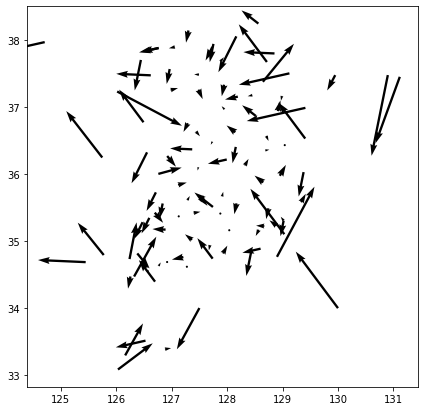

In [12]:
plt.figure(figsize=(7,7))
plt.figure(1)
plt.quiver(x, y, u, v)
# plt.axis([125, 131, 33, 39])
plt.show()

## 3. Simple interploation with Scipy

In [13]:
xx = np.linspace(126, 130, 100)
yy = np.linspace(34, 37.5, 100)
xx, yy = np.meshgrid(xx, yy)

In [14]:
plt.figure(2)
points = np.transpose(np.vstack((x, y)))
u_interp = interpolate.griddata(points, u, (xx, yy), method = 'cubic')
v_interp = interpolate.griddata(points, v, (xx, yy), method = 'cubic')

<Figure size 432x288 with 0 Axes>

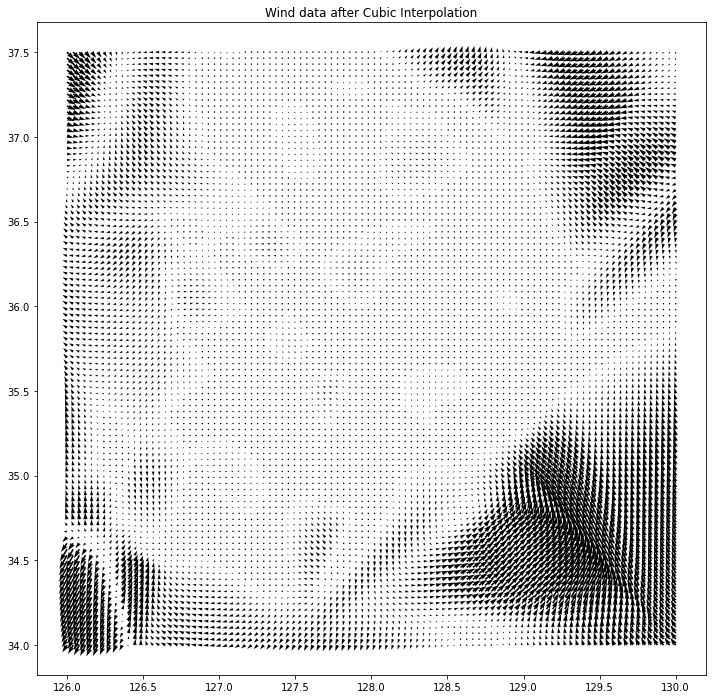

In [16]:
plt.rcParams["figure.figsize"] = (12,12)

plt.quiver(xx, yy, u_interp, v_interp)
plt.title("Wind data after Cubic Interpolation")
plt.savefig("fig6.jpg")
plt.show()

In [180]:
print(np.sum(np.isnan(u_interp)))
print(np.sum(np.isnan(v_interp)))

0
0


In [181]:
inter_lat = np.array(yy)
inter_lon = np.array(xx)
inter_u = u_interp
inter_v = v_interp

In [182]:
np.savetxt('Interpolation_wind/Hour3_inter_lat.txt', inter_lat)
np.savetxt('Interpolation_wind/Hour3_inter_lon.txt', inter_lon)
np.savetxt('Interpolation_wind/Hour3_inter_u.txt', inter_u)
np.savetxt('Interpolation_wind/Hour3_inter_v.txt', inter_v)

In [183]:
for hour in range(24) :
    x = globals()['vHour_{}'.format(hour+1)][:,2]
    y = globals()['vHour_{}'.format(hour+1)][:,1]
    u = globals()['vHour_{}'.format(hour+1)][:,3]
    v = globals()['vHour_{}'.format(hour+1)][:,4]
    
    xx = np.linspace(126, 130, 100)
    yy = np.linspace(34, 37.5, 100)
    xx, yy = np.meshgrid(xx, yy)
    
    points = np.transpose(np.vstack((x, y)))
    u_interp = interpolate.griddata(points, u, (xx, yy), method = 'cubic')
    v_interp = interpolate.griddata(points, v, (xx, yy), method = 'cubic')
    
    print(np.sum(np.isnan(u_interp)))
    print(np.sum(np.isnan(v_interp)))
    
    np.savetxt('Hour_{}'.format(hour+1) + '_inter_lat.txt', inter_lat)
    np.savetxt('Hour_{}'.format(hour+1) + '_lon.txt', inter_lon)
    np.savetxt('Hour_{}'.format(hour+1) + '_inter_u.txt', inter_u)
    np.savetxt('Hour_{}'.format(hour+1) + '_inter_v.txt', inter_v)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
